In [1]:
import numpy as np
from neural_network.layer import *
from neural_network.net import *
from queue import Queue
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
x_input = np.ones((10, 1))
y_target = np.array([[0.5], [0.5]])
linear1 = Linear(10, 5)
relu1 = ReLU(linear1)
linear2 = Linear(5, 2, relu1)
relu2 = ReLU(linear2)
linear3 = Linear(2, 2, relu2)
sigmoid = Sigmoid(linear3)
loss_layer = MSE_Loss(sigmoid)

model = NeuralNetwork(linear1, sigmoid, loss_layer)

In [3]:
"""
x_input = np.ones((10, 1))
y_target = np.array([[0.5], [0.5]])

linear1 = Linear(10, 5, layer_id=1)
relu1 = ReLU(linear1, layer_id=1)
linear2 = Linear(5, 5, relu1, layer_id=2)
relu2 = ReLU(linear2, layer_id=2)

add1 = Addition([relu1, relu2], layer_id=1)

linear3 = Linear(5, 5, add1, layer_id=3)
relu3 = ReLU(linear3, layer_id=3)

add2 = Addition([relu2, relu3], layer_id=2)

linear4 = Linear(5, 2, add2, layer_id=4)
sigmoid = Sigmoid(linear4)
loss_layer = MSE_Loss(sigmoid)

model = NeuralNetwork(linear1, sigmoid, loss_layer)
"""

'\nx_input = np.ones((10, 1))\ny_target = np.array([[0.5], [0.5]])\n\nlinear1 = Linear(10, 5, layer_id=1)\nrelu1 = ReLU(linear1, layer_id=1)\nlinear2 = Linear(5, 5, relu1, layer_id=2)\nrelu2 = ReLU(linear2, layer_id=2)\n\nadd1 = Addition([relu1, relu2], layer_id=1)\n\nlinear3 = Linear(5, 5, add1, layer_id=3)\nrelu3 = ReLU(linear3, layer_id=3)\n\nadd2 = Addition([relu2, relu3], layer_id=2)\n\nlinear4 = Linear(5, 2, add2, layer_id=4)\nsigmoid = Sigmoid(linear4)\nloss_layer = MSE_Loss(sigmoid)\n\nmodel = NeuralNetwork(linear1, sigmoid, loss_layer)\n'

In [4]:
print(model.n_layers)
print(model.output_layer)

print("Forward order:")
for layer in model._forward_order:
    print(layer)

print("\nBackward order:")
for layer in model._backward_order:
    print(layer)

net_out = model.forward(x_input)

print("\nNet out:", net_out)

7
Forward order:
Linear: (10, 1) -> (5, 1)
ReLU
Linear: (5, 1) -> (2, 1)
ReLU
Linear: (2, 1) -> (2, 1)
Sigmoid
MSE Loss

Backward order:
MSE Loss
Sigmoid
Linear: (2, 1) -> (2, 1)
ReLU
Linear: (5, 1) -> (2, 1)
ReLU
Linear: (10, 1) -> (5, 1)

Net out: [[0.99921878]
 [0.60585896]]


In [5]:
loss_array = []
for i in tqdm(range(20000)):
    out = model.forward(x_input)
    #print(out)
    loss = model.loss_layer.forward(out, y_target)
    loss_array.append(loss)
    model.backward()
    model.step()

100%|██████████| 10000/10000 [00:00<00:00, 13781.31it/s]


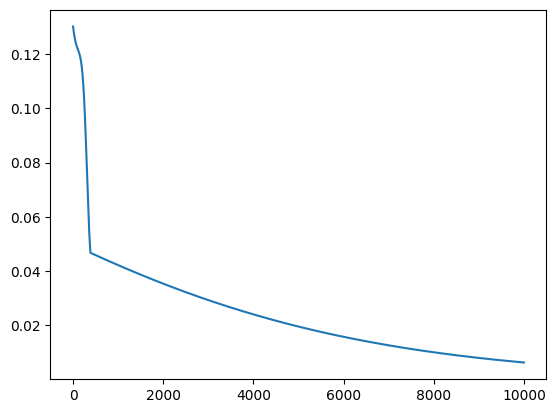

In [6]:
plt.plot(loss_array)